In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')

# To convert Julian date to standard date
import datetime
from datetime import datetime
from datetime import time

import warnings
warnings.filterwarnings('ignore')

## Toy Example

In [3]:
from sklearn.ensemble import IsolationForest
X1 = np.random.normal(loc= -2, size= (100,2))
X2 = np.random.normal(loc= 4, size= (100,2))
X3 = np.random.normal(loc= -5, size= (100,2))
A = np.array([[5,-5]])
toy_data = np.concatenate((X3, A, X1,X2))

### Isolation Forest with high contamination value

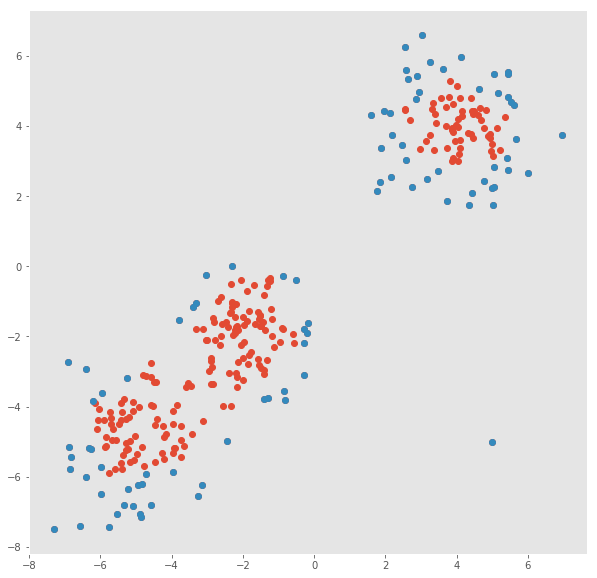

In [4]:
isolation_forest = IsolationForest(n_estimators=100, contamination = 0.3)
isolation_forest.fit(toy_data)

anomaly_score = isolation_forest.decision_function(toy_data)
outlier = isolation_forest.predict(toy_data)
outliers = np.where(outlier==-1)[0]

fig, ax = plt.subplots();fig.set_size_inches(10,10); 
plt.plot(toy_data[:,0], toy_data[:,1],'o')
plt.plot(toy_data[outliers, 0], toy_data[outliers,1],'o')
plt.grid(); plt.show()

### Isolation Forest with LOW contamination value

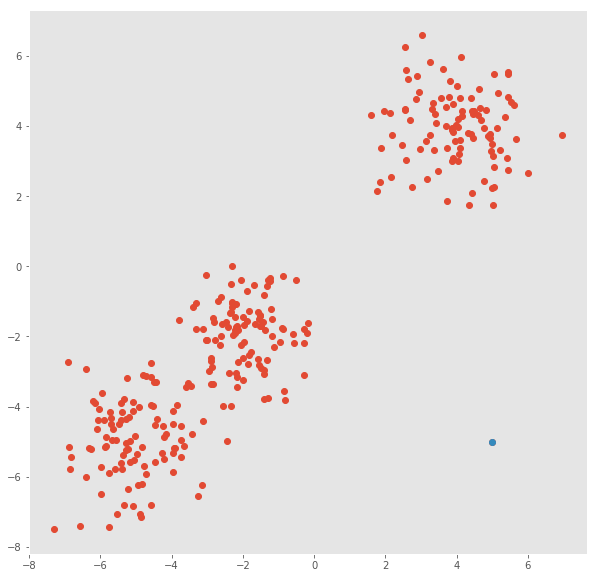

In [6]:
isolation_forest = IsolationForest(n_estimators=100, contamination = 0.001)
isolation_forest.fit(toy_data)

# anomaly_score = isolation_forest.decision_function(toy_data)
outlier = isolation_forest.predict(toy_data)
outliers = np.where(outlier==-1)[0]

fig, ax = plt.subplots(); fig.set_size_inches(10,10); 
plt.plot(toy_data[:,0], toy_data[:,1],'o')
plt.plot(toy_data[outliers, 0], toy_data[outliers,1],'o')
plt.grid(); plt.show()

### Statistical Anomaly Detection

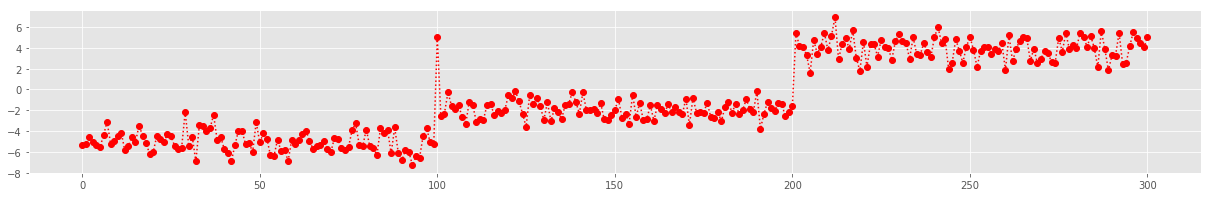

In [10]:
messages = toy_data[:,0]
fig = plt.figure(); fig.set_size_inches(21,3); 
plt.plot(messages, ':ro');

In [11]:
m,s = messages.mean(), messages.std()
anomaly_days = np.where(np.abs(messages-m) > 3 * s)
print(anomaly_days)

(array([], dtype=int64),)


In [12]:
m,s

(-0.9709950905899303, 3.8693360651410673)

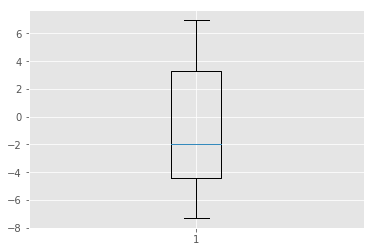

In [14]:
plt.boxplot(messages)
plt.show()

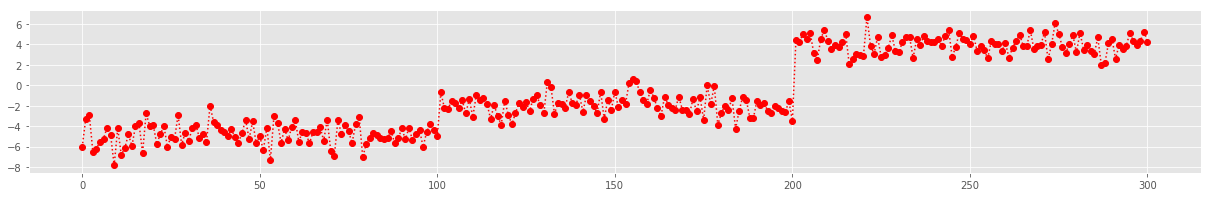

In [8]:
messages = toy_data[:,1]
fig = plt.figure(); fig.set_size_inches(21,3); 
plt.plot(messages, ':ro');

In [9]:
m,s = messages.mean(), messages.std()
anomaly_days = np.where(np.abs(messages-m) > 3 * s)
print(anomaly_days)

(array([], dtype=int64),)


# Result 

__Take Home Message__ :
>  Looking feature-by-feature with statistical measures does not help. It may not found an obvious anomaly. Random Forest can look feature vector as a whole, and can find the anomaly!!

__But__:
> If statistical measures finds something, its certainly an anomaly!!

# Important Note
> An anomaly might have attribute values that are individually very frequent, but whose combination is very rare


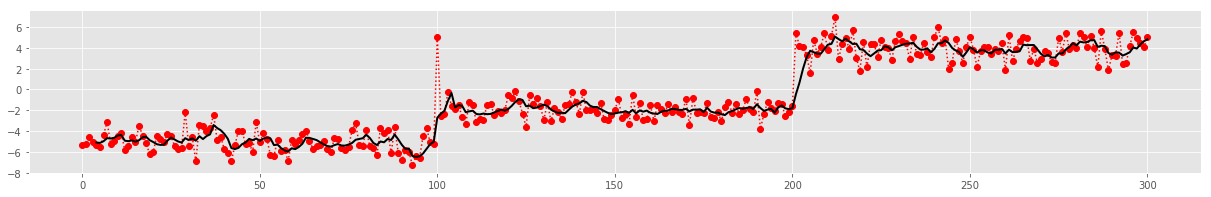

In [23]:
messages = pd.DataFrame(toy_data[:,0])
fig = plt.figure(); fig.set_size_inches(21,3); 
plt.plot(messages, ':ro');
plt.plot(messages.rolling(window=5).mean(), 'k', lw = 2)

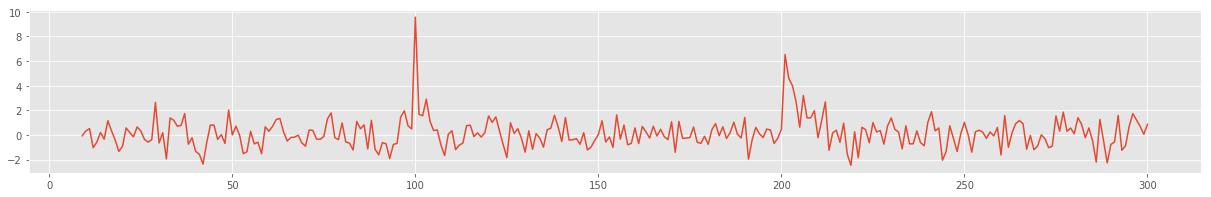

In [29]:
fig = plt.figure(); fig.set_size_inches(21,3); 
de_mean_messages = messages - messages.rolling(window=10).mean()
plt.plot(de_mean_messages)

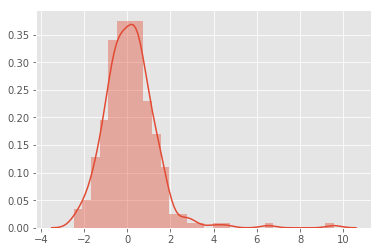

In [30]:
sns.distplot(de_mean_messages[9:])

In [31]:
m,s = de_mean_messages.mean(), de_mean_messages.std()
anomaly_days = np.where(np.abs(de_mean_messages-m) > 3 * s)
print(anomaly_days)

(array([100, 201, 202, 203]), array([0, 0, 0, 0]))
